In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import TomekLinks

In [3]:
Heart_Dataset= pd.read_csv("heart.csv")

In [4]:
Heart_Dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
Heart_Dataset.shape

(303, 14)

In [6]:
Heart_Dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
print(Heart_Dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
# Data Preprocessing
# Converting categorical variables to dummy variables
df = pd.get_dummies(Heart_Dataset, drop_first=True)

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Splitting data into features (X) and target (y)
X = df.drop(columns=['target'])  # Assuming that 'target' is the output column
y = df['target']


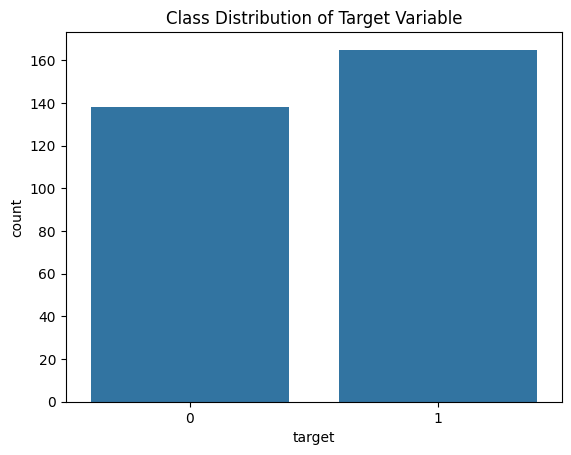

target
1    54.455446
0    45.544554
Name: proportion, dtype: float64


In [11]:
# Checking class distribution
sns.countplot(x=df['target'])
plt.title("Class Distribution of Target Variable")
plt.show()

# Printing exact class counts
print(df['target'].value_counts(normalize=True) * 100)

In [12]:
#since  dataset is well balanced,no need of using tomeks links

In [13]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [16]:
X_test.shape

(61, 13)

In [17]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Models to Evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": 
	RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}


Logistic Regression:
Accuracy: 0.8524590163934426
Cross Validation Score: 0.8180272108843537
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



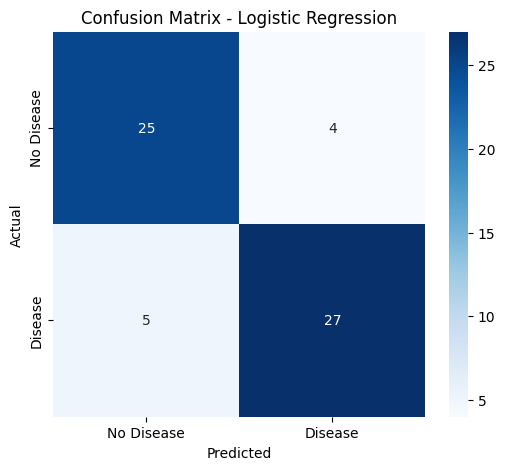


Random Forest:
Accuracy: 0.8360655737704918
Cross Validation Score: 0.8057823129251702
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



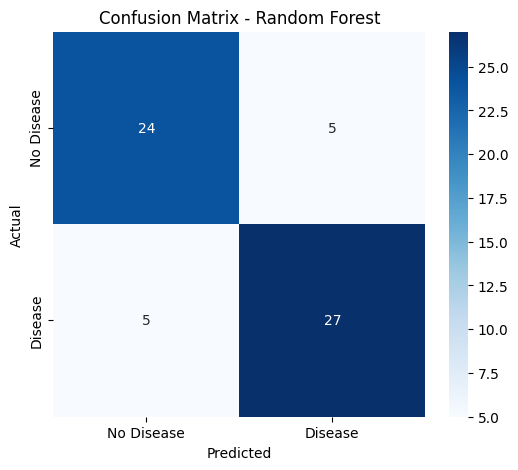


Support Vector Machine:
Accuracy: 0.8688524590163934
Cross Validation Score: 0.8139455782312925
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



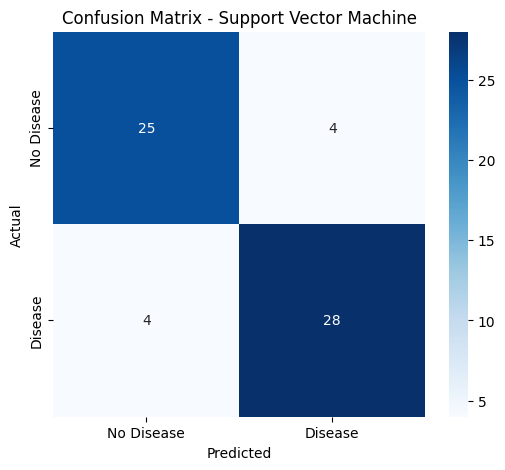


K-Nearest Neighbors:
Accuracy: 0.9016393442622951
Cross Validation Score: 0.8141156462585034
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



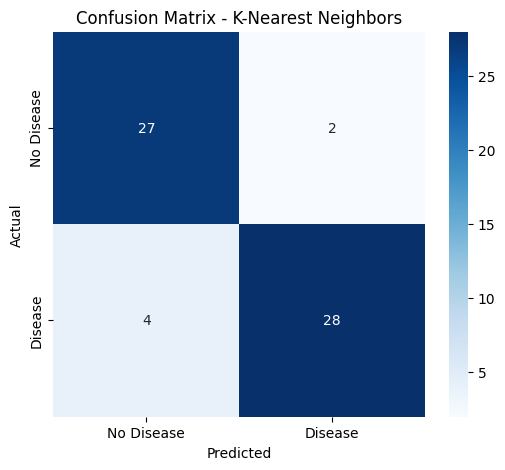


Best Model Based on Accuracy:  KNeighborsClassifier()


In [19]:
# Model Training & Evaluation
results = {}
best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    results[name] = {"Accuracy": acc, "Cross Validation Score": cv_score}
    
    print(f"\n{name}:")
    print("Accuracy:", acc)
    print("Cross Validation Score:", cv_score)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
	# Plotting Confusion Matrix as a heatmap
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Saving the best model based on accuracy
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
    
# Checking which model has the highest accuracy
print("\nBest Model Based on Accuracy: ", best_model)

In [20]:
# Save the best model using pickle
import pickle
filename='heartss_model.sav'
pickle.dump(best_model,open(filename,'wb'))

In [23]:
import pickle  # Library to load saved models

# Load the saved model
with open("heartss_model.sav", "rb") as file:
    model = pickle.load(file)

# Print the model type to check if it's KNN
print("Loaded Model Type:", type(model))

# Verify it's a KNN model
from sklearn.neighbors import KNeighborsClassifier

if isinstance(model, KNeighborsClassifier):
    print("✅ The loaded model is a K-Nearest Neighbors (KNN) model.")
else:
    print("❌ The loaded model is NOT a KNN model.")


Loaded Model Type: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
✅ The loaded model is a K-Nearest Neighbors (KNN) model.
